In [ ]:
# Step 1: Upload file from your local computer
from google.colab import files
uploaded = files.upload()


Saving tips.csv to tips.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv('tips.csv')  # Make sure the filename matches what you uploaded
df.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
# Numerical columns for full statistics
num_cols = ['total_bill', 'tip', 'size']

# Initialize a dictionary to store statistics
basic_stats = {}

# Loop through numerical columns and compute statistics
for col in num_cols:
    basic_stats[col] = {
        'Mean': round(df[col].mean(), 2),
        'Median': round(df[col].median(), 2),
        'Mode': round(df[col].mode().iloc[0], 2),
        'Standard Deviation': round(df[col].std(), 2),
        'Min': round(df[col].min(), 2),
        'Max': round(df[col].max(), 2)
    }

# Categorical columns (only mode makes sense)
cat_cols = ['sex', 'day']
for col in cat_cols:
    basic_stats[col] = {
        'Mode': df[col].mode().iloc[0]
    }

# Convert results into a DataFrame
stats_df = pd.DataFrame(basic_stats).T
print("📊 Basic Statistics:\n")
print(stats_df)


📊 Basic Statistics:

             Mean Median   Mode Standard Deviation   Min    Max
total_bill  19.79   17.8  13.42                8.9  3.07  50.81
tip           3.0    2.9    2.0               1.38   1.0   10.0
size         2.57    2.0    2.0               0.95   1.0    6.0
sex           NaN    NaN   Male                NaN   NaN    NaN
day           NaN    NaN    Sat                NaN   NaN    NaN


In [ ]:
# Check for missing values
missing = df.isnull().sum()

print("🔍 Missing Values in Each Column:\n")
print(missing)

# Optional: Show only columns with missing values
print("\n📌 Columns with Missing Values:")
print(missing[missing > 0])


🔍 Missing Values in Each Column:

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

📌 Columns with Missing Values:
Series([], dtype: int64)


In [ ]:
# Numerical columns to check for outliers
num_cols = ['total_bill', 'tip', 'size']

print("📊 Outliers Detected Using IQR:\n")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")
    print(f"  ⬇ Below {lower_bound:.2f}, ⬆ Above {upper_bound:.2f}")


📊 Outliers Detected Using IQR:

total_bill: 9 outliers
  ⬇ Below -2.82, ⬆ Above 40.30
tip: 9 outliers
  ⬇ Below -0.34, ⬆ Above 5.91
size: 9 outliers
  ⬇ Below 0.50, ⬆ Above 4.50


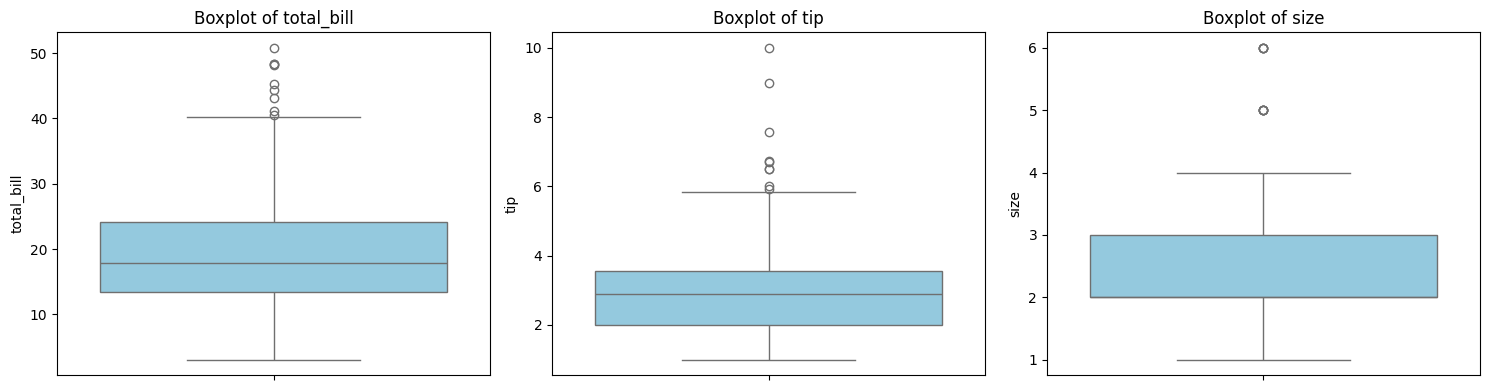

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for clean visuals
plt.figure(figsize=(15, 4))

# Plot boxplots for all numeric columns
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



📈 Univariate Analysis for: total_bill
Mean: 19.79
Median: 17.80
Mode: 13.42
Standard Deviation: 8.90
Min: 3.07
Max: 50.81


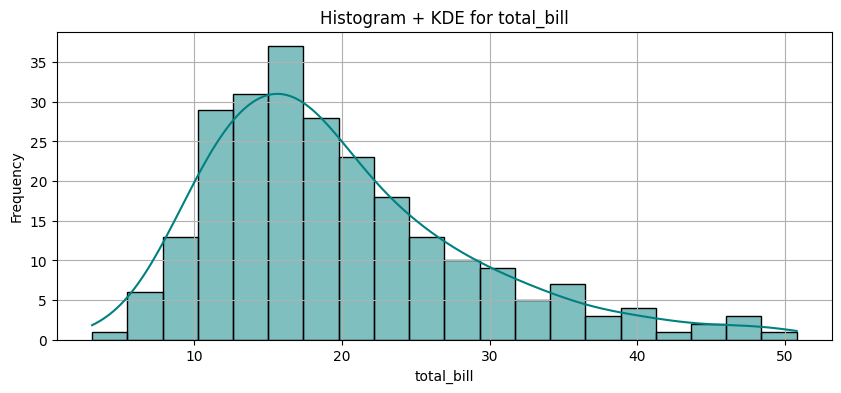

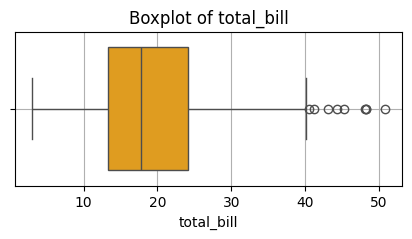


📈 Univariate Analysis for: tip
Mean: 3.00
Median: 2.90
Mode: 2.00
Standard Deviation: 1.38
Min: 1.00
Max: 10.00


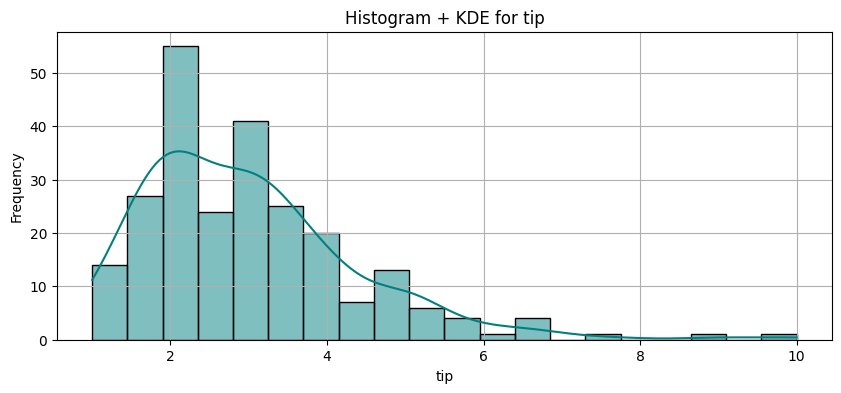


📈 Univariate Analysis for: size
Mean: 2.57
Median: 2.00
Mode: 2.00
Standard Deviation: 0.95
Min: 1.00
Max: 6.00


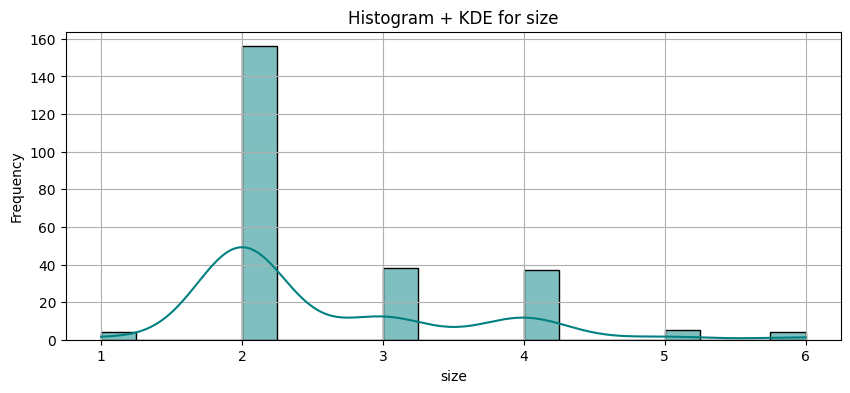

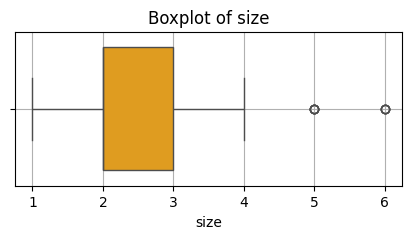

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['total_bill', 'tip', 'size']

# Loop through each numerical column
for col in num_cols:
    print(f"\n📈 Univariate Analysis for: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().iloc[0]:.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")

    # Histogram with KDE
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=20, color='teal')
    plt.title(f'Histogram + KDE for {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Boxplot
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()



📊 Univariate Analysis for: sex
sex
Male      157
Female     87
Name: count, dtype: int64
Mode: Male


/tmp/ipython-input-10-3902343954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')



📊 Univariate Analysis for: smoker
smoker
No     151
Yes     93
Name: count, dtype: int64
Mode: No


/tmp/ipython-input-10-3902343954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


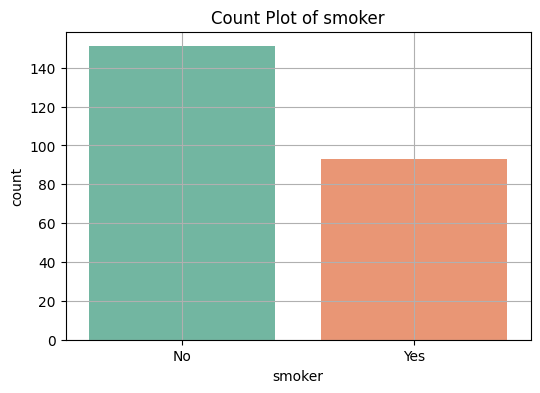


📊 Univariate Analysis for: day
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Mode: Sat


/tmp/ipython-input-10-3902343954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


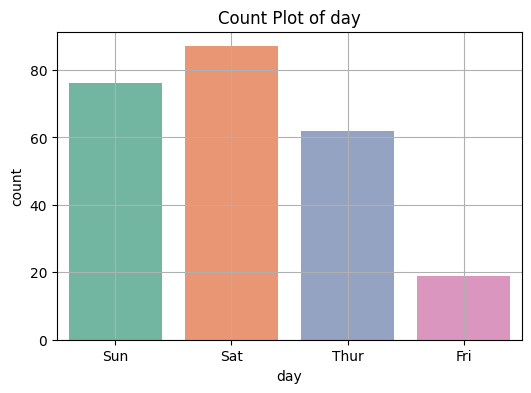

/tmp/ipython-input-10-3902343954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')



📊 Univariate Analysis for: time
time
Dinner    176
Lunch      68
Name: count, dtype: int64
Mode: Dinner


In [ ]:
cat_cols = ['sex', 'smoker', 'day', 'time']

# Loop through each categorical column
for col in cat_cols:
    print(f"\n📊 Univariate Analysis for: {col}")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode().iloc[0]}")

    # Count plot
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.grid(True)
    plt.show()


/tmp/ipython-input-11-2227395580.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='tip', data=df, palette='Set2')


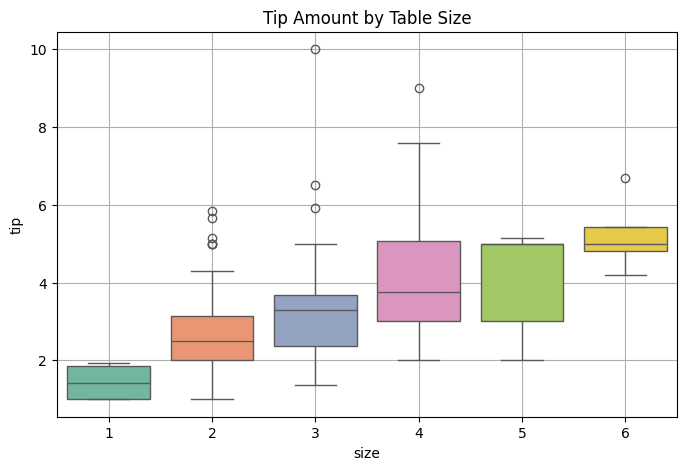


📊 Correlation Matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


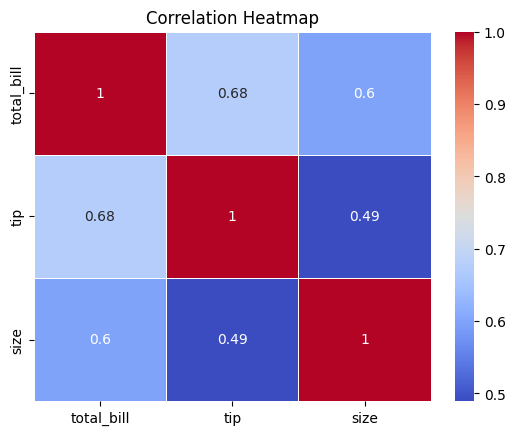

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. total_bill vs tip
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', palette='Set1')
plt.title('Total Bill vs Tip')
plt.grid(True)
plt.show()

# 2. size vs tip
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='tip', data=df, palette='Set2')
plt.title('Tip Amount by Table Size')
plt.grid(True)
plt.show()

# 3. Correlation matrix (only numeric columns)
correlation = df[['total_bill', 'tip', 'size']].corr()
print("\n📊 Correlation Matrix:\n", correlation)

# Optional: Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-12-600666163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='tip', data=df, palette='pastel')


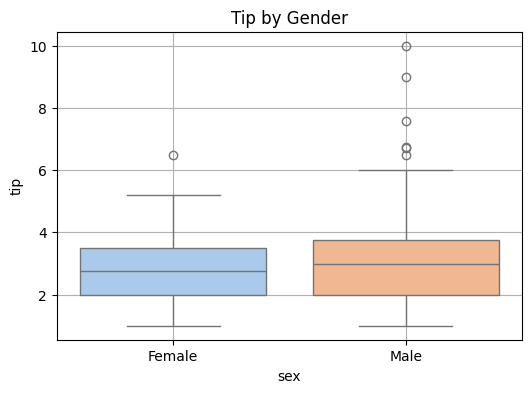

/tmp/ipython-input-12-600666163.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='tip', data=df, palette='muted')


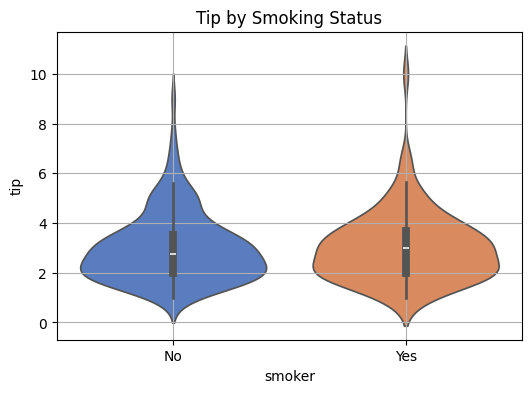

/tmp/ipython-input-12-600666163.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=df, estimator='mean', palette='viridis')


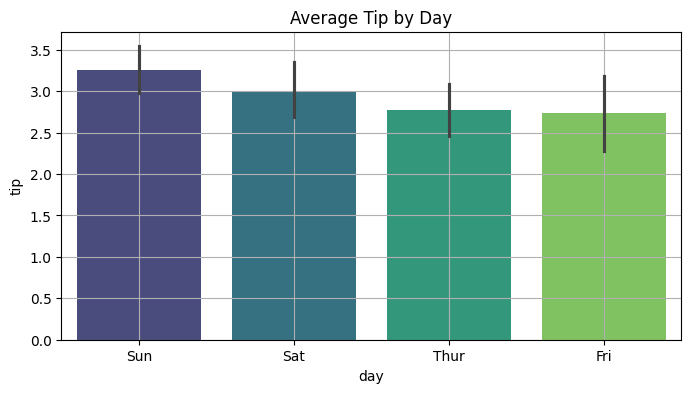

In [ ]:
# 1. Tip by Sex
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='tip', data=df, palette='pastel')
plt.title('Tip by Gender')
plt.grid(True)
plt.show()

# 2. Tip by Smoker
plt.figure(figsize=(6,4))
sns.violinplot(x='smoker', y='tip', data=df, palette='muted')
plt.title('Tip by Smoking Status')
plt.grid(True)
plt.show()

# 3. Tip by Day
plt.figure(figsize=(8,4))
sns.barplot(x='day', y='tip', data=df, estimator='mean', palette='viridis')
plt.title('Average Tip by Day')
plt.grid(True)
plt.show()



Sex vs Smoker (%):
 smoker         No        Yes
sex                         
Female  62.068966  37.931034
Male    61.783439  38.216561


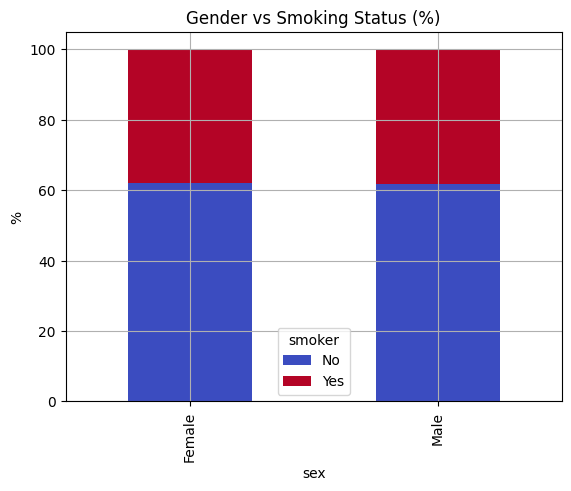


Day vs Time (%):
 time      Dinner      Lunch
day                        
Fri    63.157895  36.842105
Sat   100.000000   0.000000
Sun   100.000000   0.000000
Thur    1.612903  98.387097


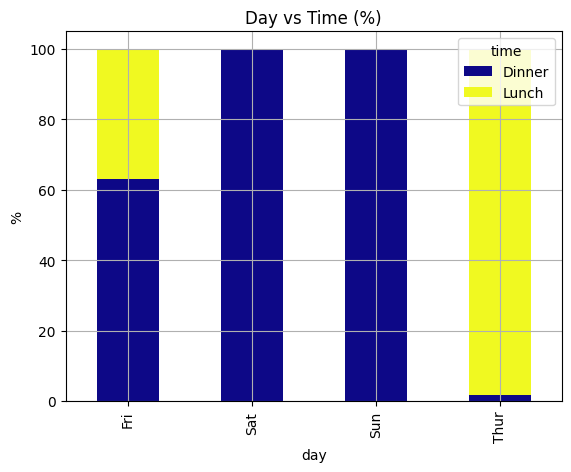

In [ ]:
# Cross-tab: sex vs smoker
ct1 = pd.crosstab(df['sex'], df['smoker'], normalize='index') * 100
print("\nSex vs Smoker (%):\n", ct1)

# Bar plot for the same
ct1.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Gender vs Smoking Status (%)')
plt.ylabel('%')
plt.grid(True)
plt.show()

# Cross-tab: day vs time
ct2 = pd.crosstab(df['day'], df['time'], normalize='index') * 100
print("\nDay vs Time (%):\n", ct2)

ct2.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Day vs Time (%)')
plt.ylabel('%')
plt.grid(True)
plt.show()
